**Importing Required Modules**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow as tf
import keras
import os
import cv2
import pickle
import random

In [3]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers.normalization import batch_normalization
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Sequential
from matplotlib.image import imread
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import seaborn as sns


Data Path


In [4]:
train = r'D:/tomato/train'
test = r'D:/tomato/val'
size=256

In [5]:
train_images = []
train_labels = []
for directory_path in glob.glob('D:/tomato/train/*'):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path,"*.jpg")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img,(256,256))
        train_images.append(img)
        train_labels.append(label)

Tomato___Bacterial_spot
Tomato___healthy
Tomato___Late_blight
Tomato___Septoria_leaf_spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [6]:
test_images = []
test_labels = []
for directory_path in glob.glob('D:/tomato/val/*'):
    label = directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path,"*.jpg")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img,(256,256))
        test_images.append(img)
        test_labels.append(label)

In [7]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [10]:
x_train , y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [11]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)


**VGG-16**

In [110]:
from keras.applications.vgg16 import VGG16

In [12]:
VGG_model = VGG16(weights='imagenet', include_top=False,input_shape=(size,size,3))

In [14]:
for layer in VGG_model.layers:
    layer.trainable = False
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [16]:
x = Flatten()(VGG_model.output)
prediction = Dense(5,activation='softmax')(x)
VGG_model = Model(inputs=VGG_model.input, outputs = prediction)
VGG_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

                                                                 
 block3_conv1 (Conv2D)       (None, 64, 64, 256)       295168    
                                                                 
 block3_conv2 (Conv2D)       (None, 64, 64, 256)       590080    
                                                                 
 block3_conv3 (Conv2D)       (None, 64, 64, 256)       590080    
                                                                 
 block3_pool (MaxPooling2D)  (None, 32, 32, 256)       0         
                                                                 
 block4_conv1 (Conv2D)       (None, 32, 32, 512)       1180160   
                                                                 
 block4_conv2 (Conv2D)       (None, 32, 32, 512)       2359808   
                                                                 
 block4_conv3 (Conv2D)       (None, 32, 32, 512)       2359808   
                                                                 
 block4_po

In [17]:
VGG_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = VGG_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
79/79 [==============================] - 279s 4s/step - loss: 0.6967 - accuracy: 0.7816 - val_loss: 0.3184 - val_accuracy: 0.8980
Epoch 2/5
79/79 [==============================] - 281s 4s/step - loss: 0.1476 - accuracy: 0.9548 - val_loss: 0.2462 - val_accuracy: 0.9120
Epoch 3/5
79/79 [==============================] - 271s 3s/step - loss: 0.0609 - accuracy: 0.9912 - val_loss: 0.2036 - val_accuracy: 0.9300
Epoch 4/5
79/79 [==============================] - 281s 4s/step - loss: 0.0540 - accuracy: 0.9896 - val_loss: 0.1985 - val_accuracy: 0.9220
Epoch 5/5
79/79 [==============================] - 287s 4s/step - loss: 0.0215 - accuracy: 0.9992 - val_loss: 0.2133 - val_accuracy: 0.9240


In [20]:
VGG_model.evaluate(x_test, y_test)

16/16 [==============================] - 46s 3s/step - loss: 0.2133 - accuracy: 0.9240


[0.21332240104675293, 0.9240000247955322]

In [126]:
VGG_pred = VGG_model.predict(x_test)

16/16 [==============================] - 49s 3s/step


In [127]:
predicted_classes = np.argmax(VGG_pred, axis=1)

true_classes = test_labels_encoded

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Performances of Model 1")
print("Model => VGG-16\n")

# Calculate Accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Calculate precision
precision = precision_score(true_classes, predicted_classes, average='weighted')

# Calculate recall
recall = recall_score(true_classes, predicted_classes, average='weighted')

# Calculate F1 score
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Performances of Model 1
Model => VGG-16

Accuracy: 0.92
Precision: 0.93
Recall: 0.92
F1 Score: 0.92


**DesnseNet**

In [111]:
from keras.applications import DenseNet201


In [19]:
DenseNet_model = DenseNet201(weights='imagenet', include_top=False,input_shape=(size,size,3))

74836368/74836368 [==============================] - 18s 0us/step


In [24]:
for layer in DenseNet_model.layers:
    layer.trainable = False
DenseNet_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 128, 128, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [25]:
x = Flatten()(DenseNet_model.output)
prediction = Dense(5,activation='softmax')(x)
DenseNet_model = Model(inputs=DenseNet_model.input, outputs = prediction)
DenseNet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 128, 128, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [26]:
DenseNet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = DenseNet_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
79/79 [==============================] - 295s 4s/step - loss: 1.7781 - accuracy: 0.8344 - val_loss: 0.5705 - val_accuracy: 0.9300
Epoch 2/5
79/79 [==============================] - 278s 4s/step - loss: 0.2068 - accuracy: 0.9660 - val_loss: 0.6356 - val_accuracy: 0.9300
Epoch 3/5
79/79 [==============================] - 274s 3s/step - loss: 0.0527 - accuracy: 0.9864 - val_loss: 1.3314 - val_accuracy: 0.9140
Epoch 4/5
79/79 [==============================] - 270s 3s/step - loss: 0.0476 - accuracy: 0.9896 - val_loss: 0.7645 - val_accuracy: 0.9340
Epoch 5/5
79/79 [==============================] - 280s 4s/step - loss: 0.0067 - accuracy: 0.9968 - val_loss: 0.5243 - val_accuracy: 0.9440


In [28]:
DenseNet_model.evaluate(x_test, y_test)

16/16 [==============================] - 48s 3s/step - loss: 0.5243 - accuracy: 0.9440


[0.5243204832077026, 0.9440000057220459]

In [130]:
Dense_pred = DenseNet_model.predict(x_test)

16/16 [==============================] - 46s 3s/step


In [131]:
predicted_classes = np.argmax(Dense_pred, axis=1)

true_classes = test_labels_encoded

In [132]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Performances of Model 2")
print("Model => DenseNet\n")

# Calculate Accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Calculate precision
precision = precision_score(true_classes, predicted_classes, average='weighted')

# Calculate recall
recall = recall_score(true_classes, predicted_classes, average='weighted')

# Calculate F1 score
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Performances of Model 2
Model => DenseNet

Accuracy: 0.94
Precision: 0.95
Recall: 0.94
F1 Score: 0.94


**Inception_ResNet-V2**

In [32]:
from keras.applications import InceptionResNetV2

In [33]:
IRN_model = InceptionResNetV2(weights='imagenet', include_top=False,input_shape=(size,size,3))

In [34]:
for layer in IRN_model.layers:
    layer.trainable = False
IRN_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                               

In [36]:
x = Flatten()(IRN_model.output)
prediction = Dense(5,activation='softmax')(x)
IRN_model = Model(inputs=IRN_model.input, outputs = prediction)
IRN_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     


 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                                 
                                                                                                  
 activation (Activation)        (None, 127, 127, 32  0           ['batch_normalization[0][0]']    
          

In [37]:
IRN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
history = IRN_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
 1/79 [..............................] - ETA: 2:46 - loss: 0.2242 - accuracy: 0.9688

79/79 [==============================] - 206s 3s/step - loss: 0.1712 - accuracy: 0.9592 - val_loss: 1.0499 - val_accuracy: 0.8760
Epoch 2/5
79/79 [==============================] - 201s 3s/step - loss: 0.0905 - accuracy: 0.9780 - val_loss: 1.2493 - val_accuracy: 0.8160
Epoch 3/5
79/79 [==============================] - 186s 2s/step - loss: 0.1281 - accuracy: 0.9672 - val_loss: 1.1728 - val_accuracy: 0.8580
Epoch 4/5
79/79 [==============================] - 200s 3s/step - loss: 0.0776 - accuracy: 0.9792 - val_loss: 1.1016 - val_accuracy: 0.8740
Epoch 5/5
79/79 [==============================] - 207s 3s/step - loss: 0.0339 - accuracy: 0.9908 - val_loss: 1.5299 - val_accuracy: 0.8580


In [40]:
IRN_model.evaluate(x_test, y_test)

16/16 [==============================] - 36s 2s/step - loss: 1.5299 - accuracy: 0.8580


[1.5299371480941772, 0.8579999804496765]

In [133]:
IRN_pred = IRN_model.predict(x_test)

16/16 [==============================] - 34s 2s/step


In [134]:
predicted_classes = np.argmax(IRN_pred, axis=1)

true_classes = test_labels_encoded

In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Performances of Model 3")
print("Model => Inception_ResNet-V2\n")

# Calculate Accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Calculate precision
precision = precision_score(true_classes, predicted_classes, average='weighted')

# Calculate recall
recall = recall_score(true_classes, predicted_classes, average='weighted')

# Calculate F1 score
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Performances of Model 3
Model => Inception_ResNet-V2

Accuracy: 0.86
Precision: 0.89
Recall: 0.86
F1 Score: 0.86


**MobileNet-V3_Large**

In [44]:
from keras.applications import MobileNetV3Large

In [45]:
mobNet_model = MobileNetV3Large(weights='imagenet', include_top=False,input_shape=(size,size,3))

In [46]:
for layer in mobNet_model.layers:
    layer.trainable = False
mobNet_model.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['input_4[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 128, 128, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

In [47]:
x = Flatten()(mobNet_model.output)
prediction = Dense(5,activation='softmax')(x)
mobNet_model = Model(inputs=mobNet_model.input, outputs = prediction)
mobNet_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['input_4[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 128, 128, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                            

In [48]:
mobNet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = mobNet_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
79/79 [==============================] - 57s 677ms/step - loss: 1.9836 - accuracy: 0.3396 - val_loss: 1.3006 - val_accuracy: 0.4960
Epoch 2/5
79/79 [==============================] - 53s 674ms/step - loss: 1.1792 - accuracy: 0.5136 - val_loss: 1.2027 - val_accuracy: 0.4820
Epoch 3/5
79/79 [==============================] - 49s 624ms/step - loss: 1.1270 - accuracy: 0.5544 - val_loss: 1.3436 - val_accuracy: 0.5060
Epoch 4/5
79/79 [==============================] - 52s 663ms/step - loss: 0.9979 - accuracy: 0.6140 - val_loss: 0.9740 - val_accuracy: 0.6700
Epoch 5/5
79/79 [==============================] - 49s 625ms/step - loss: 0.9432 - accuracy: 0.6256 - val_loss: 0.8793 - val_accuracy: 0.6900


In [50]:
mobNet_model.evaluate(x_test, y_test)

16/16 [==============================] - 8s 514ms/step - loss: 0.8793 - accuracy: 0.6900


[0.879262387752533, 0.6899999976158142]

In [136]:
mobNet_pred = mobNet_model.predict(x_test)

16/16 [==============================] - 8s 519ms/step


In [137]:
predicted_classes = np.argmax(mobNet_pred, axis=1)

true_classes = test_labels_encoded

In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Performances of Model 4")
print("Model => MobileNet-V3_Large\n")

# Calculate Accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Calculate precision
precision = precision_score(true_classes, predicted_classes, average='weighted')

# Calculate recall
recall = recall_score(true_classes, predicted_classes, average='weighted')

# Calculate F1 score
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Performances of Model 4
Model => MobileNet-V3_Large

Accuracy: 0.69
Precision: 0.73
Recall: 0.69
F1 Score: 0.69


**NasNet_Mobile**

In [54]:
from keras.applications import NASNetMobile 

In [55]:
Nas_Mob_model = NASNetMobile(weights='imagenet', include_top=False,input_shape=(size,size,3))

In [56]:
for layer in Nas_Mob_model.layers:
    layer.trainable = False
Nas_Mob_model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 127, 127, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 127, 127, 32  128         ['stem_conv1[0][0]']             
                                )                                                            

In [57]:
x = Flatten()(Nas_Mob_model.output)
prediction = Dense(5,activation='softmax')(x)
Nas_Mob_model = Model(inputs=Nas_Mob_model.input, outputs = prediction)
Nas_Mob_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 127, 127, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 127, 127, 32  128         ['stem_conv1[0][0]']             
                                )                                                           

In [58]:
Nas_Mob_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [59]:
history = Nas_Mob_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
79/79 [==============================] - 85s 950ms/step - loss: 2.8175 - accuracy: 0.7200 - val_loss: 0.9874 - val_accuracy: 0.8680
Epoch 2/5
79/79 [==============================] - 72s 913ms/step - loss: 0.3186 - accuracy: 0.9432 - val_loss: 0.8447 - val_accuracy: 0.8780
Epoch 3/5
79/79 [==============================] - 73s 930ms/step - loss: 0.0844 - accuracy: 0.9752 - val_loss: 0.7192 - val_accuracy: 0.8940
Epoch 4/5
79/79 [==============================] - 73s 923ms/step - loss: 0.0496 - accuracy: 0.9844 - val_loss: 0.7241 - val_accuracy: 0.8900
Epoch 5/5
79/79 [==============================] - 73s 931ms/step - loss: 0.0150 - accuracy: 0.9948 - val_loss: 0.6960 - val_accuracy: 0.8920


In [60]:
Nas_Mob_model.evaluate(x_test, y_test)

16/16 [==============================] - 12s 771ms/step - loss: 0.6960 - accuracy: 0.8920


[0.6960358619689941, 0.8920000195503235]

In [139]:
Nas_Mob_pred = Nas_Mob_model.predict(x_test)

16/16 [==============================] - 13s 806ms/step


In [140]:
predicted_classes = np.argmax(Nas_Mob_pred, axis=1)

true_classes = test_labels_encoded

In [141]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Performances of Model 5")
print("Model => NasNet_Mobile\n")

# Calculate Accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Calculate precision
precision = precision_score(true_classes, predicted_classes, average='weighted')

# Calculate recall
recall = recall_score(true_classes, predicted_classes, average='weighted')

# Calculate F1 score
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Performances of Model 5
Model => NasNet_Mobile

Accuracy: 0.89
Precision: 0.90
Recall: 0.89
F1 Score: 0.89


**ResNet-50**

In [64]:
from keras.applications import ResNet50

In [65]:
ResNet_model = ResNet50(weights='imagenet', include_top=False,input_shape=(size,size,3))

In [66]:
for layer in ResNet_model.layers:
    layer.trainable = False
ResNet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [67]:
x = Flatten()(ResNet_model.output)
prediction = Dense(5,activation='softmax')(x)
ResNet_model = Model(inputs=ResNet_model.input, outputs = prediction)
ResNet_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [70]:
ResNet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
history = ResNet_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
79/79 [==============================] - 161s 2s/step - loss: 5.3667 - accuracy: 0.3592 - val_loss: 1.1800 - val_accuracy: 0.5740
Epoch 2/5
79/79 [==============================] - 165s 2s/step - loss: 1.0762 - accuracy: 0.5952 - val_loss: 1.0906 - val_accuracy: 0.5020
Epoch 3/5
79/79 [==============================] - 166s 2s/step - loss: 1.0291 - accuracy: 0.6268 - val_loss: 1.2247 - val_accuracy: 0.5940
Epoch 4/5
79/79 [==============================] - 152s 2s/step - loss: 0.8192 - accuracy: 0.7216 - val_loss: 1.0159 - val_accuracy: 0.6420
Epoch 5/5
79/79 [==============================] - 143s 2s/step - loss: 0.9093 - accuracy: 0.6852 - val_loss: 2.1976 - val_accuracy: 0.4580


In [72]:
ResNet_model.evaluate(x_test, y_test)

16/16 [==============================] - 25s 2s/step - loss: 2.1976 - accuracy: 0.4580


[2.1976468563079834, 0.4580000042915344]

In [142]:
ResNet_pred = ResNet_model.predict(x_test)

16/16 [==============================] - 26s 2s/step


In [143]:
predicted_classes = np.argmax(ResNet_pred, axis=1)

true_classes = test_labels_encoded

In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Performances of Model 6")
print("Model => ResNet50\n")

# Calculate Accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Calculate precision
precision = precision_score(true_classes, predicted_classes, average='weighted')

# Calculate recall
recall = recall_score(true_classes, predicted_classes, average='weighted')

# Calculate F1 score
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Performances of Model 6
Model => ResNet50

Accuracy: 0.46
Precision: 0.67
Recall: 0.46
F1 Score: 0.36


**Inception-V3**

In [ ]:
from keras.applications import InceptionV3

In [76]:
InV3_model = InceptionV3(weights='imagenet', include_top=False,input_shape=(size,size,3))

87910968/87910968 [==============================] - 9s 0us/step


In [ ]:
for layer in InV3_model.layers:
    layer.trainable = False
InV3_model.summary()

In [77]:
x = Flatten()(InV3_model.output)
prediction = Dense(5,activation='softmax')(x)
InV3_model = Model(inputs=InV3_model.input, outputs = prediction)
InV3_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_203 (Conv2D)            (None, 127, 127, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_203 (Batch  (None, 127, 127, 32  96         ['conv2d_203[0][0]']             
 Normalization)                 )                                                           

In [78]:
InV3_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
history = InV3_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
79/79 [==============================] - 428s 5s/step - loss: 1.9212 - accuracy: 0.6492 - val_loss: 47.4716 - val_accuracy: 0.2000
Epoch 2/5
79/79 [==============================] - 377s 5s/step - loss: 0.7160 - accuracy: 0.8528 - val_loss: 19484.4043 - val_accuracy: 0.2280
Epoch 3/5
79/79 [==============================] - 374s 5s/step - loss: 0.6686 - accuracy: 0.8504 - val_loss: 17633.0000 - val_accuracy: 0.1900
Epoch 4/5
79/79 [==============================] - 411s 5s/step - loss: 0.6532 - accuracy: 0.8396 - val_loss: 1.8101 - val_accuracy: 0.8060
Epoch 5/5
79/79 [==============================] - 393s 5s/step - loss: 0.5591 - accuracy: 0.8556 - val_loss: 1093.7662 - val_accuracy: 0.6320


In [80]:
InV3_model.evaluate(x_test, y_test)

16/16 [==============================] - 13s 816ms/step - loss: 1093.7662 - accuracy: 0.6320


[1093.7662353515625, 0.6320000290870667]

In [145]:
InV3_pred = InV3_model.predict(x_test)

16/16 [==============================] - 13s 809ms/step


In [147]:
predicted_classes = np.argmax(InV3_pred, axis=1)

true_classes = test_labels_encoded

In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Performances of Model 7")
print("Model => Inception-V3\n")

# Calculate Accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Calculate precision
precision = precision_score(true_classes, predicted_classes, average='weighted')

# Calculate recall
recall = recall_score(true_classes, predicted_classes, average='weighted')

# Calculate F1 score
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Performances of Model 7
Model => Inception-V3

Accuracy: 0.63
Precision: 0.68
Recall: 0.63
F1 Score: 0.62


**Xception**

In [84]:
from keras.applications import Xception

In [87]:
Xcep_model = Xception(weights='imagenet', include_top=False,input_shape=(size,size,3))

83683744/83683744 [==============================] - 46s 1us/step


In [88]:
for layer in Xcep_model.layers:
    layer.trainable = False
Xcep_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 127, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 127, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [89]:
x = Flatten()(Xcep_model.output)
prediction = Dense(5,activation='softmax')(x)
Xcep_model = Model(inputs=Xcep_model.input, outputs = prediction)
Xcep_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 127, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 127, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [90]:
Xcep_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [91]:
history = Xcep_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
79/79 [==============================] - 148s 2s/step - loss: 1.5835 - accuracy: 0.8104 - val_loss: 1.1985 - val_accuracy: 0.8980
Epoch 2/5
79/79 [==============================] - 139s 2s/step - loss: 0.3224 - accuracy: 0.9436 - val_loss: 0.5118 - val_accuracy: 0.9180
Epoch 3/5
79/79 [==============================] - 152s 2s/step - loss: 0.1803 - accuracy: 0.9720 - val_loss: 1.1969 - val_accuracy: 0.8780
Epoch 4/5
79/79 [==============================] - 154s 2s/step - loss: 0.2359 - accuracy: 0.9636 - val_loss: 0.7455 - val_accuracy: 0.9160
Epoch 5/5
79/79 [==============================] - 147s 2s/step - loss: 0.0956 - accuracy: 0.9824 - val_loss: 0.8675 - val_accuracy: 0.9360


In [92]:
Xcep_model.evaluate(x_test, y_test)

16/16 [==============================] - 24s 2s/step - loss: 0.8675 - accuracy: 0.9360


[0.8675013780593872, 0.9359999895095825]

In [150]:
Xcep_pred = Xcep_model.predict(x_test)

16/16 [==============================] - 24s 2s/step


In [151]:
predicted_classes = np.argmax(Xcep_pred, axis=1)

true_classes = test_labels_encoded

In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Performances of Model 8")
print("Model => Xception\n")

# Calculate Accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Calculate precision
precision = precision_score(true_classes, predicted_classes, average='weighted')

# Calculate recall
recall = recall_score(true_classes, predicted_classes, average='weighted')

# Calculate F1 score
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Performances of Model 8
Model => Xception

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


**ResNet-101**

In [100]:
from keras.applications import ResNet101

In [101]:
RsNt101_model = ResNet101(weights='imagenet', include_top=False,input_shape=(size,size,3))

171446536/171446536 [==============================] - 23s 0us/step


In [102]:
for layer in RsNt101_model.layers:
    layer.trainable = False
RsNt101_model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_9[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [103]:
x = Flatten()(RsNt101_model.output)
prediction = Dense(5,activation='softmax')(x)
RsNt101_model = Model(inputs=RsNt101_model.input, outputs = prediction)
RsNt101_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_9[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [105]:
RsNt101_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [106]:
history = RsNt101_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
79/79 [==============================] - 275s 3s/step - loss: 3.6432 - accuracy: 0.4132 - val_loss: 1.3682 - val_accuracy: 0.3620
Epoch 2/5
79/79 [==============================] - 265s 3s/step - loss: 1.1187 - accuracy: 0.6064 - val_loss: 0.7688 - val_accuracy: 0.6800
Epoch 3/5
79/79 [==============================] - 260s 3s/step - loss: 0.9217 - accuracy: 0.6680 - val_loss: 1.3382 - val_accuracy: 0.5840
Epoch 4/5
79/79 [==============================] - 256s 3s/step - loss: 0.9262 - accuracy: 0.6780 - val_loss: 1.2329 - val_accuracy: 0.5900
Epoch 5/5
79/79 [==============================] - 272s 3s/step - loss: 0.9798 - accuracy: 0.6780 - val_loss: 2.3188 - val_accuracy: 0.4960


In [107]:
RsNt101_model.evaluate(x_test, y_test)

16/16 [==============================] - 42s 3s/step - loss: 2.3188 - accuracy: 0.4960


[2.3187785148620605, 0.4959999918937683]

In [153]:
RsNt101_pred = RsNt101_model.predict(x_test)

16/16 [==============================] - 44s 3s/step


In [154]:
predicted_classes = np.argmax(RsNt101_pred, axis=1)

true_classes = test_labels_encoded

In [155]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Performances of Model 9")
print("Model => ResNet-101\n")

# Calculate Accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Calculate precision
precision = precision_score(true_classes, predicted_classes, average='weighted')

# Calculate recall
recall = recall_score(true_classes, predicted_classes, average='weighted')

# Calculate F1 score
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Performances of Model 9
Model => ResNet-101

Accuracy: 0.50
Precision: 0.55
Recall: 0.50
F1 Score: 0.42


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**EfficientNet-B0**

In [113]:
from keras.applications import EfficientNetB0

In [114]:
Eff_model = EfficientNetB0(weights='imagenet', include_top=False,input_shape=(size,size,3))

16705208/16705208 [==============================] - 3s 0us/step


In [115]:
for layer in Eff_model.layers:
    layer.trainable = False
Eff_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 256, 256, 3)  0           ['input_10[0][0]']               
                                                                                                  
 normalization (Normalization)  (None, 256, 256, 3)  7           ['rescaling_1[0][0]']            
                                                                                                  
 rescaling_2 (Rescaling)        (None, 256, 256, 3)  0           ['normalization[0][0

In [116]:
x = Flatten()(Eff_model.output)
prediction = Dense(5,activation='softmax')(x)
Eff_model = Model(inputs=Eff_model.input, outputs = prediction)
Eff_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 256, 256, 3)  0           ['input_10[0][0]']               
                                                                                                  
 normalization (Normalization)  (None, 256, 256, 3)  7           ['rescaling_1[0][0]']            
                                                                                                  
 rescaling_2 (Rescaling)        (None, 256, 256, 3)  0           ['normalization[0][0]']    

In [117]:
Eff_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [118]:
history = Eff_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
79/79 [==============================] - 96s 1s/step - loss: 6.9392 - accuracy: 0.2036 - val_loss: 3.0171 - val_accuracy: 0.2000
Epoch 2/5
79/79 [==============================] - 89s 1s/step - loss: 2.6091 - accuracy: 0.2076 - val_loss: 2.9455 - val_accuracy: 0.2000
Epoch 3/5
79/79 [==============================] - 80s 1s/step - loss: 3.0107 - accuracy: 0.2168 - val_loss: 2.8581 - val_accuracy: 0.3360
Epoch 4/5
79/79 [==============================] - 83s 1s/step - loss: 2.4023 - accuracy: 0.2020 - val_loss: 3.6327 - val_accuracy: 0.2000
Epoch 5/5
79/79 [==============================] - 82s 1s/step - loss: 2.7911 - accuracy: 0.2116 - val_loss: 4.3967 - val_accuracy: 0.2000


In [119]:
Eff_model.evaluate(x_test, y_test)

16/16 [==============================] - 15s 924ms/step - loss: 4.3967 - accuracy: 0.2000


[4.3967108726501465, 0.20000000298023224]

In [156]:
Eff_pred = Eff_model.predict(x_test)

16/16 [==============================] - 15s 951ms/step


In [157]:
predicted_classes = np.argmax(Eff_pred, axis=1)

true_classes = test_labels_encoded

In [158]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Performances of Model 10")
print("Model => EfficientNet-B0\n")

# Calculate Accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Calculate precision
precision = precision_score(true_classes, predicted_classes, average='weighted')

# Calculate recall
recall = recall_score(true_classes, predicted_classes, average='weighted')

# Calculate F1 score
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Performances of Model 10
Model => EfficientNet-B0

Accuracy: 0.20
Precision: 0.04
Recall: 0.20
F1 Score: 0.07


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Saving the models**

In [124]:
import pickle

In [171]:

pickle.dump(VGG_model,open('D:/Pre_trained_Models/VGG_16.pkl','wb'))



In [172]:
models_to_save = [VGG_model, DenseNet_model, Nas_Mob_model, IRN_model, InV3_model, 
                  Xcep_model, mobNet_model, ResNet_model, RsNt101_model, Eff_model]

In [174]:
renames = ["VGG_16.pkl", "DenseNet.pkl", "NasNetMobile.pkl", "InceptionResNetV2.pkl", "Inception_V3.pkl",
           "Xception.pkl", "MobileNet.pkl", "ResNet_50.pkl", "ResNet_101.pkl", "EfficientNetB0.pkl"]

In [178]:
save_path = "D:/Pre_trained_Models/"
name = 0
for i in models_to_save:
    fname = renames[name]
    path_name = save_path+fname
    print(path_name, str(i))
    name += 1
    pickle.dump(i,open(path_name,'wb'))

D:/Pre_trained_Models/VGG_16.pkl <keras.engine.functional.Functional object at 0x0000014D12052920>
D:/Pre_trained_Models/DenseNet.pkl <keras.engine.functional.Functional object at 0x0000014D1385AE60>
D:/Pre_trained_Models/NasNetMobile.pkl <keras.engine.functional.Functional object at 0x0000014D24C7FAF0>
D:/Pre_trained_Models/InceptionResNetV2.pkl <keras.engine.functional.Functional object at 0x0000014D165D12D0>
D:/Pre_trained_Models/Inception_V3.pkl <keras.engine.functional.Functional object at 0x0000014D44A6DB70>
D:/Pre_trained_Models/Xception.pkl <keras.engine.functional.Functional object at 0x0000014D4ACE1270>
D:/Pre_trained_Models/MobileNet.pkl <keras.engine.functional.Functional object at 0x0000014D1D12D120>
D:/Pre_trained_Models/ResNet_50.pkl <keras.engine.functional.Functional object at 0x0000014D24DAE710>
D:/Pre_trained_Models/ResNet_101.pkl <keras.engine.functional.Functional object at 0x0000014E1865B5E0>
D:/Pre_trained_Models/EfficientNetB0.pkl <keras.engine.functional.Functi

**Testing with an image by every models**


1/1 [==============================] - 0s 130ms/step
Predicted by  VGG_16.pkl


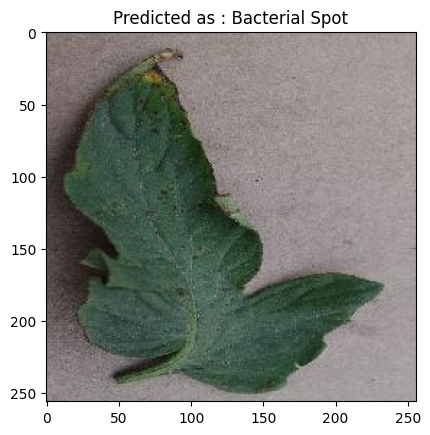

1/1 [==============================] - 0s 190ms/step
Predicted by  DenseNet.pkl


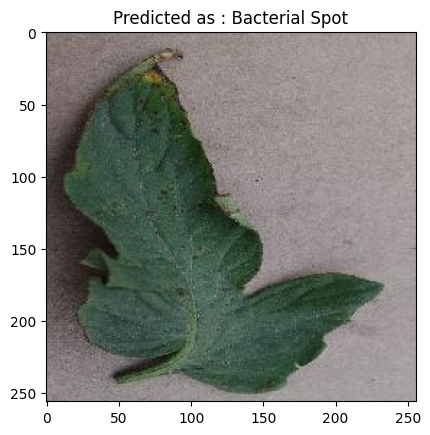

1/1 [==============================] - 0s 64ms/step
Predicted by  NasNetMobile.pkl


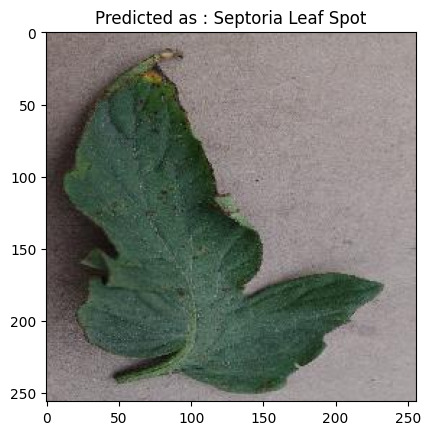

1/1 [==============================] - 0s 157ms/step
Predicted by  InceptionResNetV2.pkl


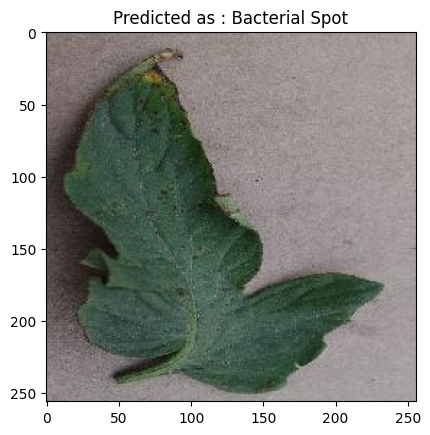

1/1 [==============================] - 0s 74ms/step
Predicted by  Inception_V3.pkl


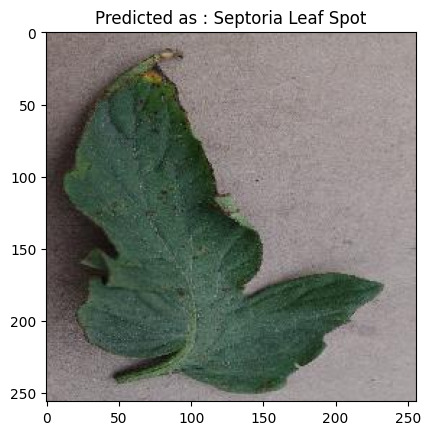

1/1 [==============================] - 0s 110ms/step
Predicted by  Xception.pkl


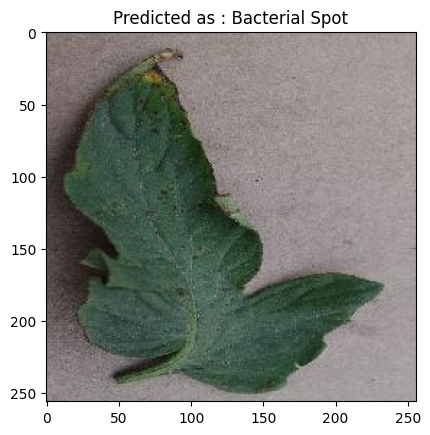

1/1 [==============================] - 0s 51ms/step
Predicted by  MobileNet.pkl


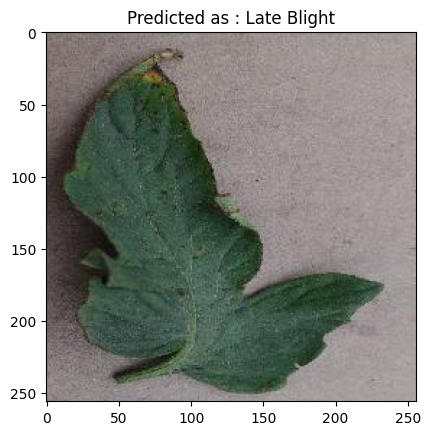

1/1 [==============================] - 0s 124ms/step
Predicted by  ResNet_50.pkl


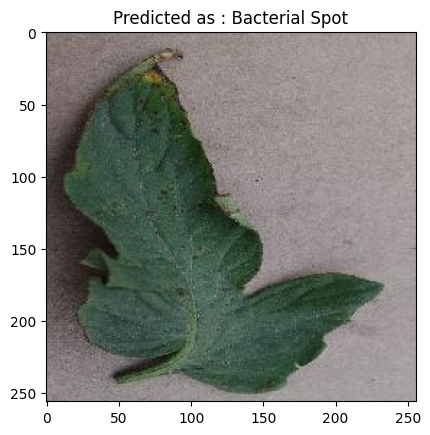

1/1 [==============================] - 0s 218ms/step
Predicted by  ResNet_101.pkl


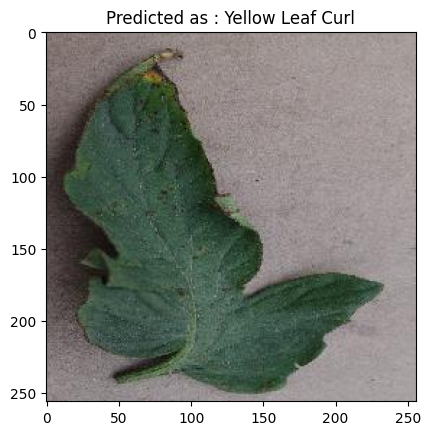

1/1 [==============================] - 0s 70ms/step
Predicted by  EfficientNetB0.pkl


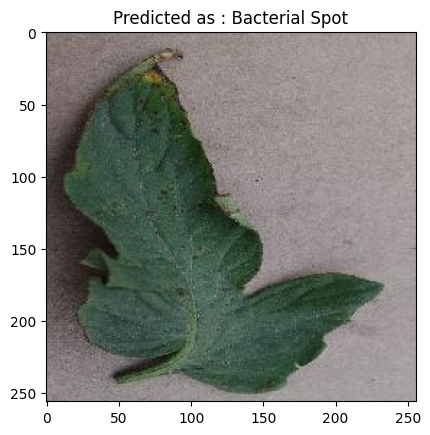

In [182]:
path = "D:/ML/Data_sets/Tomatod/tomato/test/bact_spot.JPG"
img = load_img(path,target_size=(size,size))

i = img_to_array(img)/255
input_arr = np.array([i])

r = 0
for i in models_to_save:
    plt.axis = False
    plt.show()
    pred = np.argmax(i.predict(input_arr))
    print("Predicted by ", renames[r])
    r+=1
    results = {0:"Bacterial Spot",1:"Late Blight",2:"Septoria Leaf Spot",3:"Yellow Leaf Curl",4:"Healthy"}
    prediction = results[pred]
    plt.imshow(input_arr[0])
    plt.title(f"Predicted as : {prediction}")